In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d arbethi/diabetic-retinopathy-level-detection

In [ ]:
!unzip diabetic-retinopathy-level-detection.zip

In [ ]:
!rm -rf /content/FInal_year_project_data/train_data/.ipynb_checkpoints
!rm -rf /content/FInal_year_project_data/test_data/.ipynb_checkpoints



!rm -rf /content/FInal_year_project_data/train_data/0/.ipynb_checkpoints
!rm -rf /content/FInal_year_project_data/test_data/0/.ipynb_checkpoints
!rm -rf /content/FInal_year_project_data/train_data/1/.ipynb_checkpoints
!rm -rf /content/FInal_year_project_data/test_data/1/.ipynb_checkpoints
!rm -rf /content/FInal_year_project_data/train_data/2/.ipynb_checkpoints
!rm -rf /content/FInal_year_project_data/test_data/2/.ipynb_checkpoints
!rm -rf /content/FInal_year_project_data/train_data/3/.ipynb_checkpoints
!rm -rf /content/FInal_year_project_data/test_data/3/.ipynb_checkpoints
!rm -rf /content/FInal_year_project_data/train_data/4/.ipynb_checkpoints
!rm -rf /content/FInal_year_project_data/test_data/4/.ipynb_checkpoints

In [ ]:

# IMG_SIZE=256

# Train_Class_0_DIR= "/content/FInal_year_project_data/train_data/0"
# Train_Class_1_DIR= "/content/FInal_year_project_data/train_data/1"
# Train_Class_2_DIR= "/content/FInal_year_project_data/train_data/2"
# Train_Class_3_DIR= "/content/FInal_year_project_data/train_data/3"
# Train_Class_4_DIR= "/content/FInal_year_project_data/train_data/4"



# Test_Class_0_DIR= "/content/FInal_year_project_data/test_data/0"
# Test_Class_1_DIR= "/content/FInal_year_project_data/test_data/1"
# Test_Class_2_DIR= "/content/FInal_year_project_data/test_data/2"
# Test_Class_3_DIR= "/content/FInal_year_project_data/test_data/3"
# Test_Class_4_DIR= "/content/FInal_year_project_data/test_data/4"

In [ ]:
imageSize = [299, 299]
trainPath = r"/content/preprocessed dataset/preprocessed dataset/training"
testPath = r"/content/preprocessed dataset/preprocessed dataset/testing"

In [ ]:
def assign_label(img,label1):
    return label1

In [ ]:
def make_data(label1,DIR,X,Z):
    THRESHOLD_LOW = (15, 210, 0);
    THRESHOLD_HIGH = (35, 255, 255);
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,label1)
        path = os.path.join(DIR,img)

        img = cv2.imread(path,cv2.IMREAD_UNCHANGED)
        kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
        image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

        img_binary = cv2.resize(image_sharp, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img_binary))
        Z.append(int(label))

In [ ]:
train_x = []
train_y = []
test_x = []
test_y = []

In [ ]:
make_data(0,Train_Class_0_DIR,train_x,train_y)
make_data(1,Train_Class_1_DIR,train_x,train_y)
make_data(2,Train_Class_2_DIR,train_x,train_y)
make_data(3,Train_Class_3_DIR,train_x,train_y)
make_data(4,Train_Class_4_DIR,train_x,train_y)


make_data(0,Test_Class_0_DIR,test_x,test_y)
make_data(1,Test_Class_1_DIR,test_x,test_y)
make_data(2,Test_Class_2_DIR,test_x,test_y)
make_data(3,Test_Class_3_DIR,test_x,test_y)
make_data(4,Test_Class_4_DIR,test_x,test_y)

100%|██████████| 13/13 [00:01<00:00,  7.17it/s]


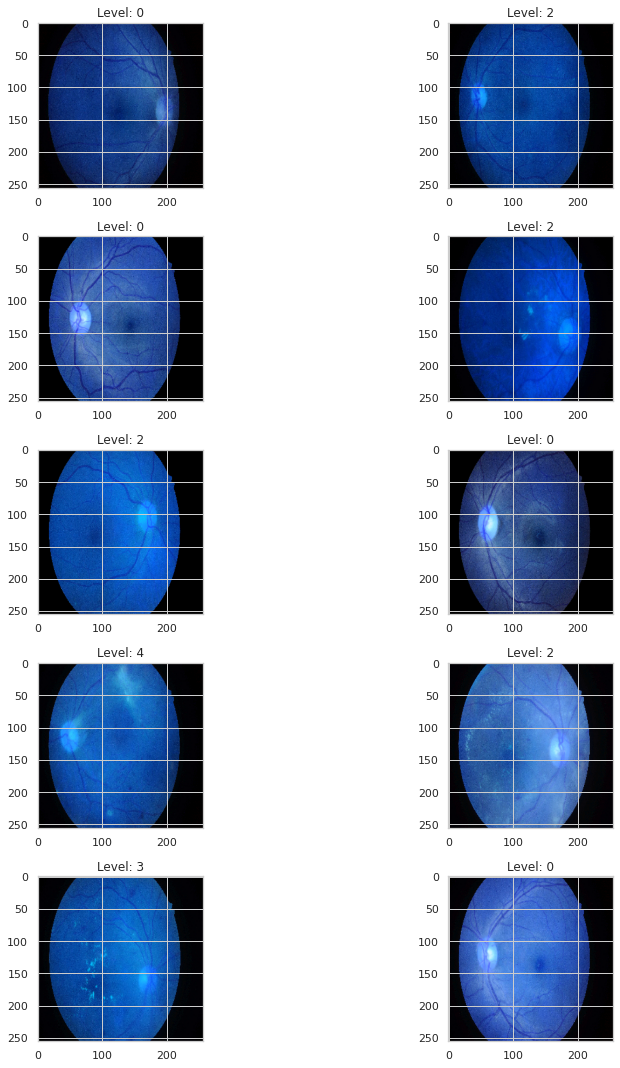

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(train_y))
        ax[i,j].imshow(train_x[l])
        ax[i,j].set_title('Level: '+ str(train_y[l]))
        
plt.tight_layout()

In [ ]:
le=LabelEncoder()
train_Y=le.fit_transform(train_y)
train_Y=to_categorical(train_Y,5)
train_x=np.array(train_x,dtype=np.uint8)
train_x=train_x/255

test_x=np.array(test_x,dtype=np.uint8)
test_x=test_x/255
test_Y=le.fit_transform(test_y)
test_Y=to_categorical(test_Y,5)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(train_x,train_Y,test_size=0.1,random_state=42)

In [ ]:
# from keras.layers import Flatten,GlobalMaxPool2D,Conv1D,MaxPool1D,Conv2D,MaxPool2D
# from keras.layers import RandomZoom,RandomRotation,Input,Dense,Dropout,Activation,GRU,Concatenate
# from keras.models import Model

# from tensorflow.keras.applications import ResNet50
# RESNET50_POOLING_AVERAGE = 'avg'

# input_shape = (256, 256, 3)


# inp = Input(shape=input_shape)
# x = Conv2D(5,2, 3, activation='relu', padding='same')(inp)
# x = Conv2D(7,2, 3, activation='relu', padding='same')(x)
# x = MaxPool2D()(x)
# x = Conv2D(8,2, 3, activation='relu', padding='same')(x)
# x = Conv2D(5,5, 3, activation='relu', padding='same')(x)
# x = MaxPool2D()(x)
# x = Conv2D(2,2, 3, activation='relu', padding='same')(x)
# x = Flatten()(x)
# x = Dense(200,activation='relu')(x)




# inp2 = Input(shape=(input_shape))
# y = Conv2D(5,5, 3, activation='relu', padding='same')(inp2)
# y = Conv2D(5,5, 3, activation='relu', padding='same')(y)
# y = MaxPool2D()(y)
# y = Conv2D(7, 3,2 ,activation='relu', padding='same')(y)
# y = Conv2D(6, 3,1, activation='relu', padding='same')(y)
# y = MaxPool2D()(y)
# y = Conv2D(5,3, 3, activation='relu', padding='same')(y)
# y = Flatten()(y)
# y = Dense(200,activation='relu')(y)

# inp3 = Input(shape=(input_shape))
# z = ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = "imagenet")(inp3)
# z = Dense(200,activation='relu')(z)

# conc2= Concatenate()([x,z])
# out=Dense(5,activation='softmax')(conc2)


# model = Model([inp,inp2,inp3], out)





In [ ]:
from keras.layers import Bidirectional,GlobalMaxPool1D,Conv1D,MaxPool1D,Conv2D,MaxPool2D
from keras.layers import LSTM,Input,Dense,Dropout,Activation,GRU,Concatenate,Flatten
from keras.models import Model

from tensorflow.keras.applications import ResNet50
RESNET50_POOLING_AVERAGE = 'avg'

input_shape = (256, 256,3)


inp = Input(shape=input_shape)
x = Conv1D(1,2, 2, activation='relu', padding='same')(inp)
x = Conv1D(2,1, 1, activation='relu', padding='same')(x)
x = Dropout(0.2)(x)
x = Conv1D(2,2, 3, activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(120,activation='relu')(x)




inp2 = Input(shape=(input_shape))
y = Conv1D(1,2, 3, activation='relu', padding='same')(inp2)
y = Dropout(0.1) (y)
y = Conv1D(3, 3,1, activation='relu', padding='same')(y)
y = Flatten()(y)
y = Dropout(0.1) (y)
y = Dense(120,activation='relu')(y)


inp3 = Input(shape=(input_shape))
z = ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = "imagenet")(inp3)
z = Dense(200,activation='relu')(z)






conc2= Concatenate()([x,y,z])
out=Dense(5,activation='softmax')(conc2)


model = Model([inp,inp2,inp3], out)





94781440/94765736 [==============================] - 1s 0us/step


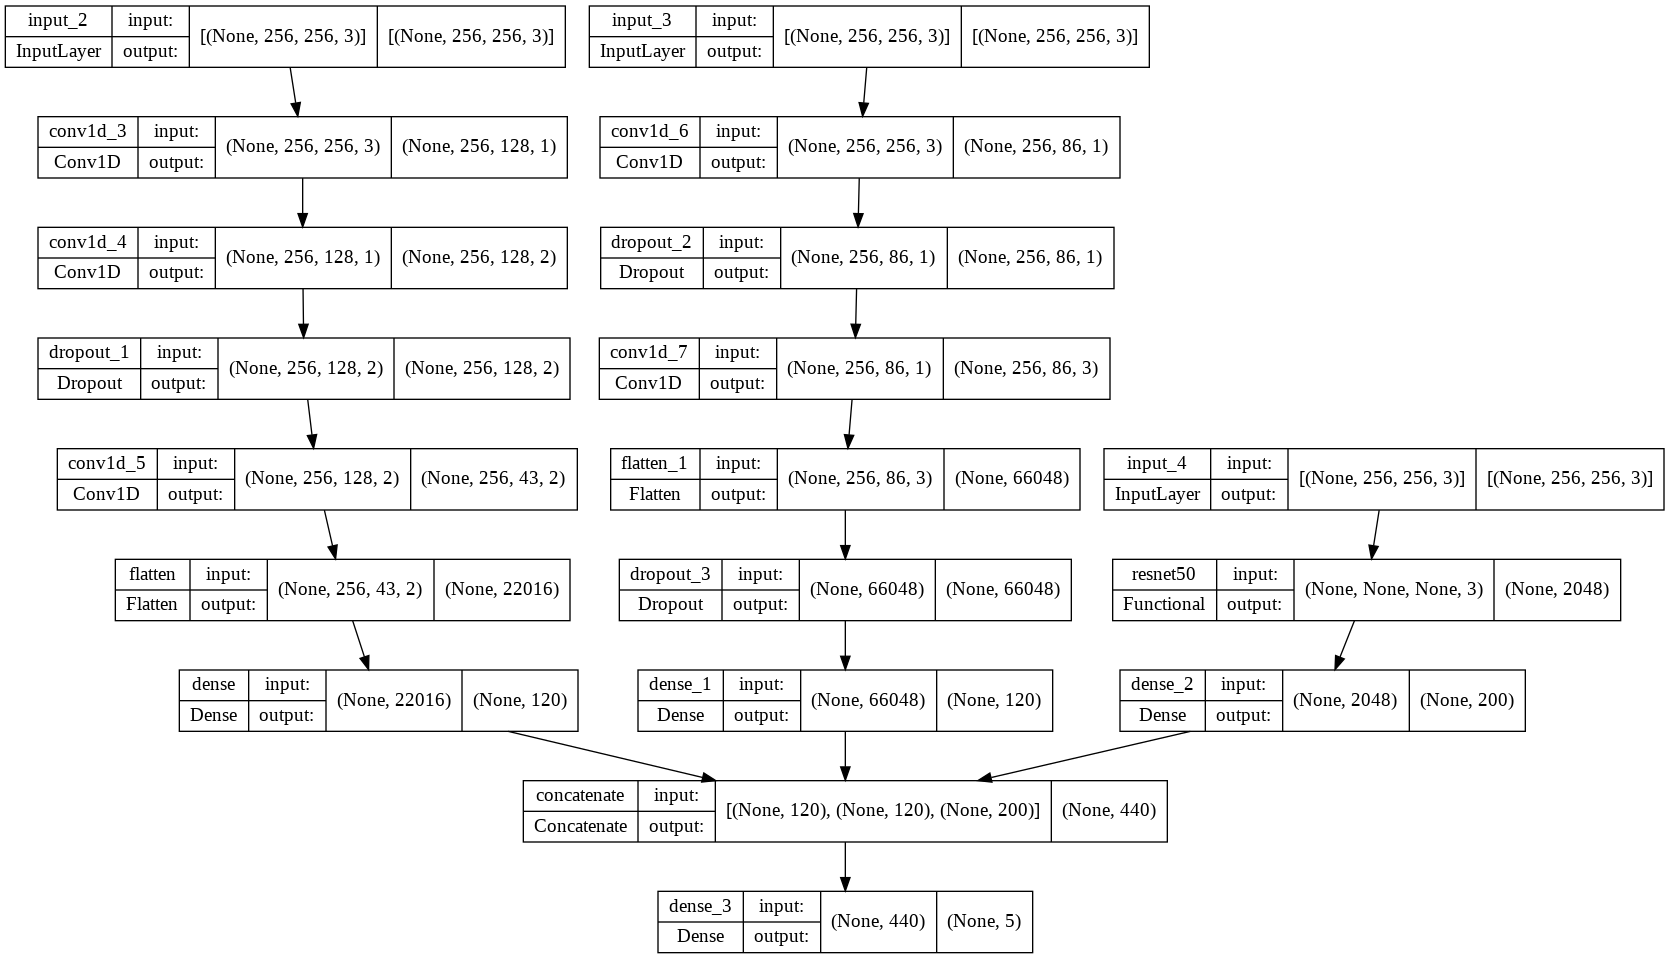

In [ ]:
from keras.utils.vis_utils import plot_model


plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
batch_size=5
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1)

In [ ]:

import tensorflow as tf
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit([x_train,x_train,x_train],y_train,epochs = 15,
                              verbose = 1, batch_size=5,validation_split=0.2)

Epoch 1/15
60/60 [==============================] - 6s 101ms/step - loss: 0.6442 - accuracy: 0.8311 - val_loss: 0.2226 - val_accuracy: 0.9467
Epoch 2/15
60/60 [==============================] - 6s 101ms/step - loss: 0.1024 - accuracy: 0.9595 - val_loss: 0.2272 - val_accuracy: 0.9333
Epoch 3/15
60/60 [==============================] - 6s 98ms/step - loss: 0.0190 - accuracy: 0.9966 - val_loss: 0.2057 - val_accuracy: 0.9333
Epoch 4/15
60/60 [==============================] - 6s 98ms/step - loss: 0.0108 - accuracy: 0.9966 - val_loss: 0.1963 - val_accuracy: 0.9333
Epoch 5/15
60/60 [==============================] - 6s 102ms/step - loss: 0.0090 - accuracy: 0.9966 - val_loss: 0.1989 - val_accuracy: 0.9333
Epoch 6/15
60/60 [==============================] - 6s 98ms/step - loss: 0.0089 - accuracy: 0.9966 - val_loss: 0.1968 - val_accuracy: 0.9333
Epoch 7/15
60/60 [==============================] - 6s 102ms/step - loss: 0.0082 - accuracy: 0.9932 - val_loss: 0.1989 - val_accuracy: 0.9467
Epoch 8/1

In [ ]:
y_pred = model.predict([test_x,test_x,test_x])
model.evaluate([test_x,test_x,test_x],test_Y,batch_size=5)

21/21 [==============================] - 1s 30ms/step - loss: 0.1236 - accuracy: 0.9903


[0.12360038608312607, 0.9902912378311157]

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

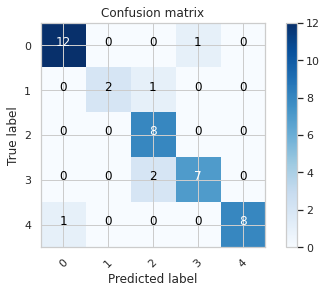

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

Y_pred = model.predict([x_test,x_test,x_test])
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(5))

In [ ]:
model.save('Updated-Hybrid-diabetic-retinopathy.h5')